<a href="https://colab.research.google.com/github/aleksandralola/memeometer/blob/main/MemeoMeter_Data_Augmentation_FV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing packages and importing libraries

In [1]:
!pip install pandas numpy matplotlib scikit-learn opencv-python pillow pytesseract transformers albumentations nlpaug nltk tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 4.8 MB/s eta 0:00:00


In [2]:
!pip install --upgrade tensorflow
!pip install --upgrade keras
!pip install --upgrade transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 83.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tens

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import nlpaug.augmenter.word as naw
import random
import nltk
from tqdm import tqdm
from PIL import Image

In [3]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Linking dataset paths
drive_path = '/content/drive/MyDrive/'
dataset_path = drive_path + 'memotion_dataset_7k/labels.csv'
images_folder_path = drive_path + 'memotion_dataset_7k/images/'

In [5]:
# Deleting corrupted image
image_path = "/content/drive/MyDrive/memotion_dataset_7k/images/image_5119.png"

if os.path.exists(image_path):
    os.remove(image_path)
    print(f"Deleted: {image_path}")
else:
    print(f"File not found: {image_path}")

File not found: /content/drive/MyDrive/memotion_dataset_7k/images/image_5119.png


In [6]:
# Loading dataset
try:
    df = pd.read_csv(dataset_path)
    print("Dataset columns:", df.columns.tolist())
except Exception as e:
    print(f"Error loading dataset: {e}")
    raise

Dataset columns: ['Unnamed: 0', 'image_name', 'text_ocr', 'text_corrected', 'humour', 'sarcasm', 'offensive', 'motivational', 'overall_sentiment']


# Checking data distribution

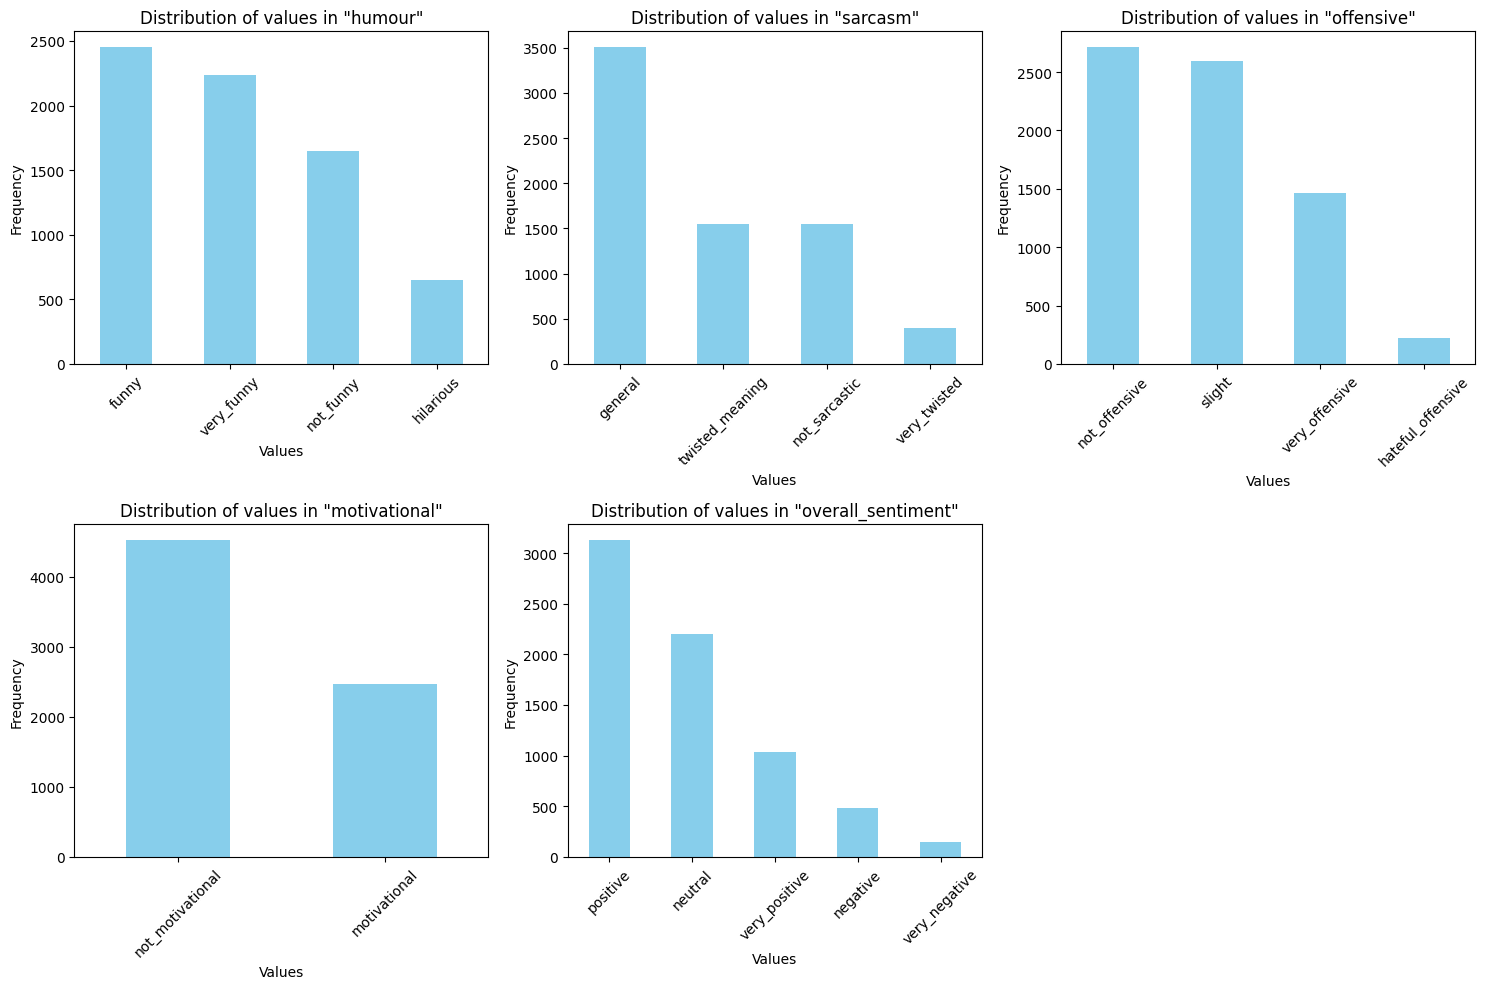

In [7]:
# Specifying columns to analyze
columns_to_plot = ['humour', 'sarcasm', 'offensive', 'motivational', 'overall_sentiment']

# Creating subplots with 3 charts per row
fig, axes = plt.subplots(nrows=(len(columns_to_plot) + 2) // 3, ncols=3, figsize=(15, 10))  # Adjust the figure size
axes = axes.flatten()  # Flatten axes array for easy indexing

# Calculating and plotting the distribution of values in each specified column
for i, column in enumerate(columns_to_plot):
    if column in df.columns:
        value_counts = df[column].value_counts()

        # Plotting the distribution on the corresponding subplot
        value_counts.plot(kind='bar', color='skyblue', ax=axes[i])
        axes[i].set_title(f'Distribution of values in "{column}"')
        axes[i].set_xlabel('Values')
        axes[i].set_ylabel('Frequency')
        axes[i].tick_params(axis='x', rotation=45)
    else:
        print(f"Column '{column}' not found in the dataset.")
        axes[i].axis('off')  # Turn off unused subplot if column is missing

# Hide unused subplots if any
for j in range(len(columns_to_plot), len(axes)):
    axes[j].axis('off')  # Turn off unused subplots

plt.tight_layout()
plt.show()

# Merging labels to even out the distribution



In [8]:
df['sarcasm'] = df['sarcasm'].replace({'very_twisted': 'twisted_meaning'})
df['offensive'] = df['offensive'].replace({'hateful_offensive': 'very_offensive'})
df['offensive'] = df['offensive'].replace({'slight': 'slight_offensive'})
df['overall_sentiment'] = df['overall_sentiment'].replace({'very_negative': 'negative'})

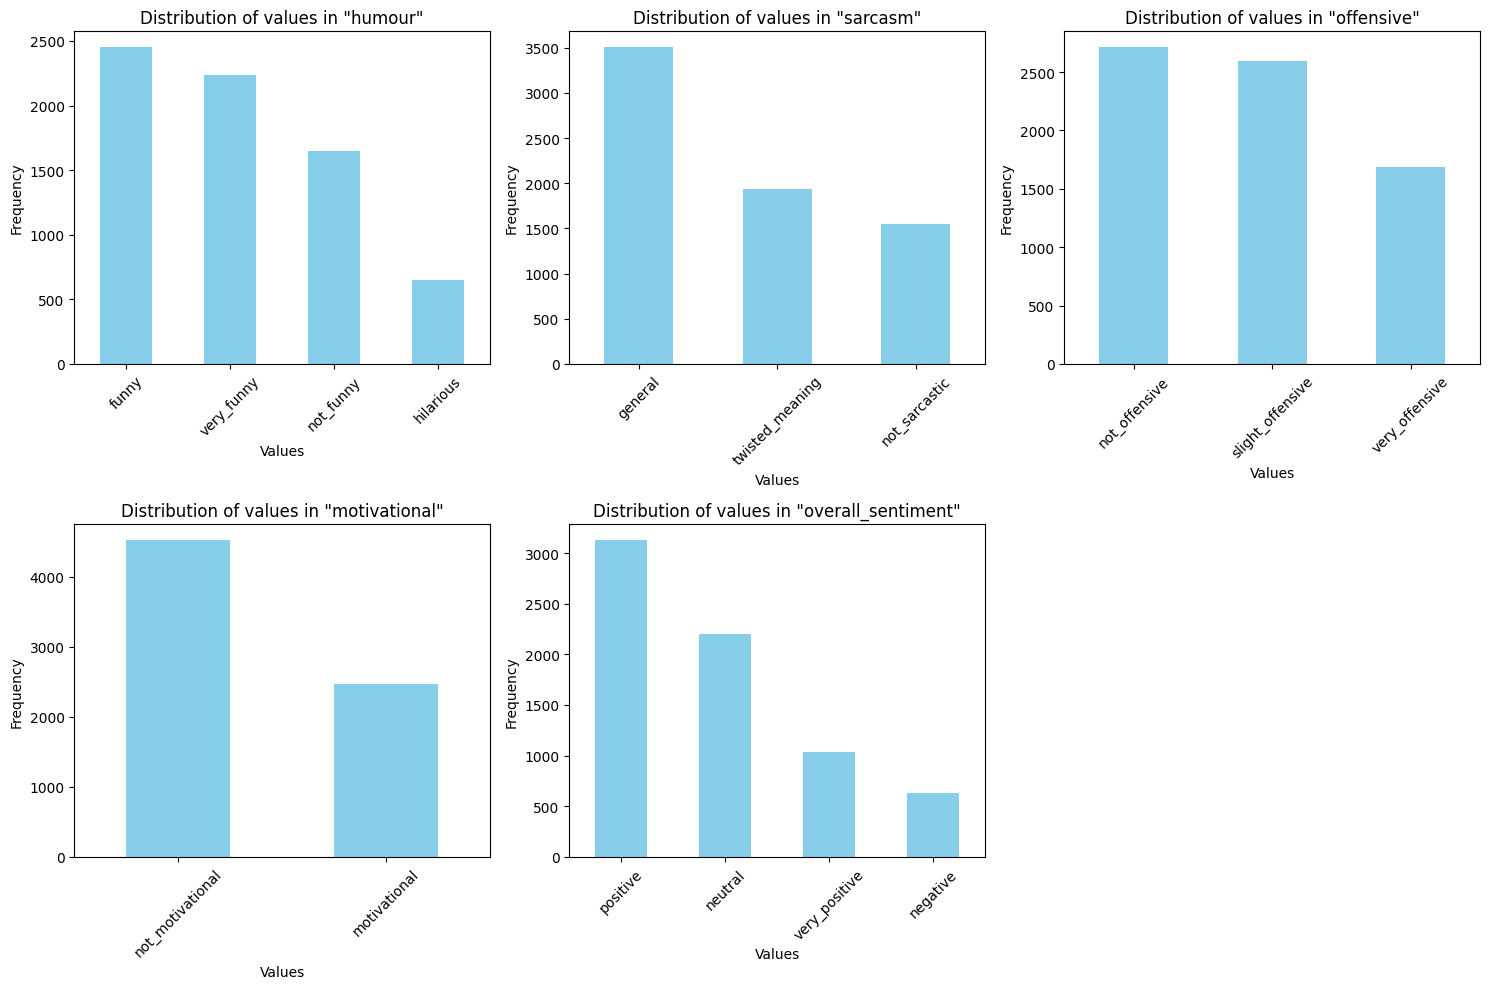

In [10]:
# Specifying columns to analyze
columns_to_plot = ['humour', 'sarcasm', 'offensive', 'motivational', 'overall_sentiment']

# Creating subplots with 3 charts per row
fig, axes = plt.subplots(nrows=(len(columns_to_plot) + 2) // 3, ncols=3, figsize=(15, 10))  # Adjust the figure size
axes = axes.flatten()  # Flatten axes array for easy indexing

# Calculating and plotting the distribution of values in each specified column
for i, column in enumerate(columns_to_plot):
    if column in df.columns:
        value_counts = df[column].value_counts()

        # Plotting the distribution on the corresponding subplot
        value_counts.plot(kind='bar', color='skyblue', ax=axes[i])
        axes[i].set_title(f'Distribution of values in "{column}"')
        axes[i].set_xlabel('Values')
        axes[i].set_ylabel('Frequency')
        axes[i].tick_params(axis='x', rotation=45)
    else:
        print(f"Column '{column}' not found in the dataset.")
        axes[i].axis('off')  # Turn off unused subplot if column is missing

# Hide unused subplots if any
for j in range(len(columns_to_plot), len(axes)):
    axes[j].axis('off')  # Turn off unused subplots

plt.tight_layout()
plt.show()

In [11]:
# Check distribution per label
for col in ['humour', 'sarcasm', 'offensive', 'motivational', 'overall_sentiment']:
    print(f"\nClass distribution for {col}:")
    print(df[col].value_counts())


Class distribution for humour:
humour
funny         2452
very_funny    2238
not_funny     1651
hilarious      651
Name: count, dtype: int64

Class distribution for sarcasm:
sarcasm
general            3507
twisted_meaning    1941
not_sarcastic      1544
Name: count, dtype: int64

Class distribution for offensive:
offensive
not_offensive       2713
slight_offensive    2592
very_offensive      1687
Name: count, dtype: int64

Class distribution for motivational:
motivational
not_motivational    4525
motivational        2467
Name: count, dtype: int64

Class distribution for overall_sentiment:
overall_sentiment
positive         3127
neutral          2201
very_positive    1033
negative          631
Name: count, dtype: int64


# Data Augmentation


In [12]:
# Downloading the required NLTK resource
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [26]:
# Setting up image directories
source_dir = '/content/drive/MyDrive/memotion_dataset_7k/images'
target_dir = '/content/drive/MyDrive/memotion_dataset_7k/images_aug'
os.makedirs(target_dir, exist_ok=True)

# Defining image augmentation + saving function
def augment_and_save(row, target_dir, num_aug_per_sample):
    augmented_rows = []
    image_name = row['image_name']
    image_path = os.path.join(source_dir, image_name)

    if not os.path.isfile(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")

    for i in range(num_aug_per_sample):
        try:
            img = Image.open(image_path)
            new_image_name = f"{os.path.splitext(image_name)[0]}_aug_{i}{os.path.splitext(image_name)[1]}"
            new_image_path = os.path.join(target_dir, new_image_name)
            img.save(new_image_path)

            new_row = row.copy()
            new_row['image_name'] = new_image_name
            augmented_rows.append(new_row)
        except Exception as e:
            print(f"⚠️ Failed to process image {image_name}: {e}")
            continue

    return augmented_rows

# Text augmentation function
def augment_text(text, n_aug=1):
    """Augments text using nlpaug library."""
    aug = naw.SynonymAug(aug_src='wordnet')
    augmented_texts = []
    for _ in range(n_aug):
        augmented_text = aug.augment(text)
        augmented_texts.append(augmented_text)
    return augmented_texts

# Global list for all augmented rows
augmented_data = []

# Defining imbalance threshold
imbalance_threshold = 0.8

# Categories to augment
categories = ['humour', 'sarcasm', 'offensive', 'motivational', 'overall_sentiment']

for category in categories:
    print(f"\nProcessing category: {category}")
    class_counts = df[category].value_counts()
    max_class_count = class_counts.max()

    for cls, count in class_counts.items():
        if count < imbalance_threshold * max_class_count:
            diff = max_class_count - count
            num_aug_needed = diff

            samples_to_aug = df[df[category] == cls]
            print(f"Augmenting class '{cls}' ({count} samples) with {num_aug_needed} total augmentations")

            skipped_text = 0
            skipped_images = 0
            aug_count = 0

            for _, row in tqdm(samples_to_aug.iterrows(), total=len(samples_to_aug)):
                if aug_count >= num_aug_needed:
                    break

                text_to_augment = row['text_corrected']

                if pd.isna(text_to_augment) or not isinstance(text_to_augment, str) or text_to_augment.strip() == "":
                    skipped_text += 1
                    continue

                # Only augment once per row to avoid going over
                n_aug = 1
                augmented_texts = augment_text(text_to_augment, n_aug)

                for aug_text in augmented_texts:
                    if aug_count >= num_aug_needed:
                        break

                    augmented_row = row.copy()
                    augmented_row['text_corrected'] = aug_text

                    try:
                        augmented_images = augment_and_save(augmented_row, target_dir, 1)
                        augmented_data.extend(augmented_images)
                        aug_count += 1
                    except Exception as e:
                        print(f"⚠️ Failed to augment image for '{augmented_row['image_name']}': {e}")
                        skipped_images += 1
                        continue

            print(f"✅ Done with class '{cls}' – Added {aug_count} rows. Skipped {skipped_text} bad text, {skipped_images} images.")
        else:
            print(f"Skipping class '{cls}' ({count} samples) – already close to or above majority class size")


Processing category: humour
Skipping class 'funny' (2452 samples) – already close to or above majority class size
Skipping class 'very_funny' (2238 samples) – already close to or above majority class size
Augmenting class 'not_funny' (1651 samples) with 801 total augmentations


  1%|▏         | 23/1651 [00:01<00:53, 30.29it/s]

⚠️ Failed to process image image_64.jpg: cannot write mode P as JPEG


  6%|▌         | 98/1651 [00:03<00:53, 29.04it/s]

⚠️ Failed to process image image_383.jpg: cannot write mode RGBA as JPEG


  7%|▋         | 120/1651 [00:03<00:34, 44.03it/s]

⚠️ Failed to process image image_518.jpg: cannot write mode RGBA as JPEG


 49%|████▊     | 802/1651 [02:27<02:35,  5.45it/s]


✅ Done with class 'not_funny' – Added 801 rows. Skipped 1 bad text, 0 images.
Augmenting class 'hilarious' (651 samples) with 1801 total augmentations


  1%|          | 8/651 [00:03<04:30,  2.37it/s]

⚠️ Failed to process image image_61.jpg: cannot write mode P as JPEG


  6%|▌         | 38/651 [00:15<04:48,  2.12it/s]

⚠️ Failed to process image image_367.jpg: cannot write mode RGBA as JPEG


 15%|█▍        | 97/651 [00:39<03:37,  2.54it/s]

⚠️ Failed to process image image_874.jpg: cannot write mode RGBA as JPEG


 40%|███▉      | 259/651 [01:43<02:24,  2.72it/s]

⚠️ Failed to process image image_2705.jpg: cannot write mode P as JPEG


 80%|████████  | 522/651 [03:31<00:44,  2.88it/s]

⚠️ Failed to process image image_5673.jpg: cannot write mode P as JPEG


100%|██████████| 651/651 [04:21<00:00,  2.49it/s]


✅ Done with class 'hilarious' – Added 650 rows. Skipped 1 bad text, 0 images.

Processing category: sarcasm
Skipping class 'general' (3507 samples) – already close to or above majority class size
Augmenting class 'twisted_meaning' (1941 samples) with 1566 total augmentations


  1%|          | 14/1941 [00:03<09:50,  3.27it/s]

⚠️ Failed to process image image_61.jpg: cannot write mode P as JPEG


 12%|█▏        | 232/1941 [01:01<06:15,  4.55it/s]

⚠️ Failed to process image image_874.jpg: cannot write mode RGBA as JPEG


 23%|██▎       | 445/1941 [02:04<09:57,  2.51it/s]

⚠️ Failed to process image image_1662.jpg: cannot write mode RGBA as JPEG


 51%|█████     | 986/1941 [04:31<05:21,  2.97it/s]

⚠️ Failed to process image image_3557.jpg: cannot write mode RGBA as JPEG


 70%|███████   | 1361/1941 [07:12<03:21,  2.88it/s]

⚠️ Failed to process image image_4924.jpg: cannot write mode P as JPEG


 73%|███████▎  | 1417/1941 [07:31<02:50,  3.08it/s]

⚠️ Failed to augment image for 'image_5119.png': Image file not found: /content/drive/MyDrive/memotion_dataset_7k/images/image_5119.png


 81%|████████  | 1567/1941 [08:21<01:59,  3.12it/s]


✅ Done with class 'twisted_meaning' – Added 1566 rows. Skipped 0 bad text, 1 images.
Augmenting class 'not_sarcastic' (1544 samples) with 1963 total augmentations


 10%|█         | 160/1544 [00:34<07:17,  3.16it/s]

⚠️ Failed to process image image_643.jpg: cannot write mode P as JPEG


 41%|████      | 635/1544 [02:22<02:39,  5.69it/s]

⚠️ Failed to process image image_2816.jpg: cannot write mode RGBA as JPEG


 84%|████████▍ | 1304/1544 [06:16<01:52,  2.14it/s]

⚠️ Failed to process image image_5946.jpg: cannot write mode RGBA as JPEG


 88%|████████▊ | 1363/1544 [06:36<00:45,  3.95it/s]

⚠️ Failed to process image image_6175.jpg: cannot write mode P as JPEG


100%|██████████| 1544/1544 [07:47<00:00,  3.30it/s]


✅ Done with class 'not_sarcastic' – Added 1543 rows. Skipped 1 bad text, 0 images.

Processing category: offensive
Skipping class 'not_offensive' (2713 samples) – already close to or above majority class size
Skipping class 'slight_offensive' (2592 samples) – already close to or above majority class size
Augmenting class 'very_offensive' (1687 samples) with 1026 total augmentations


  1%|          | 12/1687 [00:02<06:42,  4.16it/s]

⚠️ Failed to process image image_64.jpg: cannot write mode P as JPEG


 10%|█         | 177/1687 [00:27<02:59,  8.42it/s]

⚠️ Failed to process image image_874.jpg: cannot write mode RGBA as JPEG


 61%|██████    | 1026/1687 [02:25<01:33,  7.03it/s]


✅ Done with class 'very_offensive' – Added 1026 rows. Skipped 0 bad text, 0 images.

Processing category: motivational
Skipping class 'not_motivational' (4525 samples) – already close to or above majority class size
Augmenting class 'motivational' (2467 samples) with 2058 total augmentations


  1%|          | 29/2467 [00:03<02:19, 17.48it/s]

⚠️ Failed to process image image_61.jpg: cannot write mode P as JPEG


  5%|▌         | 135/2467 [00:15<03:21, 11.57it/s]

⚠️ Failed to process image image_383.jpg: cannot write mode RGBA as JPEG


 23%|██▎       | 561/2467 [01:13<03:47,  8.38it/s]

⚠️ Failed to process image image_1643.jpg: cannot write mode RGBA as JPEG


 50%|█████     | 1241/2467 [02:36<02:29,  8.20it/s]

⚠️ Failed to process image image_3557.jpg: cannot write mode RGBA as JPEG


 73%|███████▎  | 1792/2467 [04:08<01:27,  7.69it/s]

⚠️ Failed to augment image for 'image_5119.png': Image file not found: /content/drive/MyDrive/memotion_dataset_7k/images/image_5119.png


 81%|████████  | 2000/2467 [04:57<02:24,  3.23it/s]

⚠️ Failed to process image image_5673.jpg: cannot write mode P as JPEG


 84%|████████▎ | 2060/2467 [05:16<01:02,  6.51it/s]


✅ Done with class 'motivational' – Added 2058 rows. Skipped 1 bad text, 1 images.

Processing category: overall_sentiment
Skipping class 'positive' (3127 samples) – already close to or above majority class size
Augmenting class 'neutral' (2201 samples) with 926 total augmentations


  1%|          | 25/2201 [00:01<01:07, 32.25it/s]

⚠️ Failed to process image image_64.jpg: cannot write mode P as JPEG


  5%|▌         | 118/2201 [00:12<02:26, 14.26it/s]

⚠️ Failed to process image image_367.jpg: cannot write mode RGBA as JPEG


  5%|▌         | 121/2201 [00:12<02:06, 16.38it/s]

⚠️ Failed to process image image_383.jpg: cannot write mode RGBA as JPEG


 24%|██▍       | 523/2201 [00:50<01:14, 22.53it/s]

⚠️ Failed to process image image_1643.jpg: cannot write mode RGBA as JPEG


 24%|██▍       | 527/2201 [00:50<01:42, 16.37it/s]

⚠️ Failed to process image image_1662.jpg: cannot write mode RGBA as JPEG


 41%|████      | 895/2201 [01:23<01:21, 16.12it/s]

⚠️ Failed to process image image_2816.jpg: cannot write mode RGBA as JPEG


 42%|████▏     | 926/2201 [01:27<02:00, 10.58it/s]


✅ Done with class 'neutral' – Added 926 rows. Skipped 0 bad text, 0 images.
Augmenting class 'very_positive' (1033 samples) with 2094 total augmentations


  2%|▏         | 17/1033 [00:02<02:10,  7.78it/s]

⚠️ Failed to process image image_61.jpg: cannot write mode P as JPEG


  9%|▊         | 88/1033 [00:12<01:59,  7.90it/s]

⚠️ Failed to process image image_518.jpg: cannot write mode RGBA as JPEG


 70%|██████▉   | 723/1033 [01:35<00:39,  7.76it/s]

⚠️ Failed to process image image_4924.jpg: cannot write mode P as JPEG


 80%|███████▉  | 824/1033 [01:55<00:24,  8.53it/s]

⚠️ Failed to process image image_5673.jpg: cannot write mode P as JPEG


100%|██████████| 1033/1033 [02:52<00:00,  5.97it/s]


✅ Done with class 'very_positive' – Added 1033 rows. Skipped 0 bad text, 0 images.
Augmenting class 'negative' (631 samples) with 2496 total augmentations


100%|██████████| 631/631 [01:10<00:00,  8.96it/s]

✅ Done with class 'negative' – Added 631 rows. Skipped 0 bad text, 0 images.


# Checking the distribution after augmenting

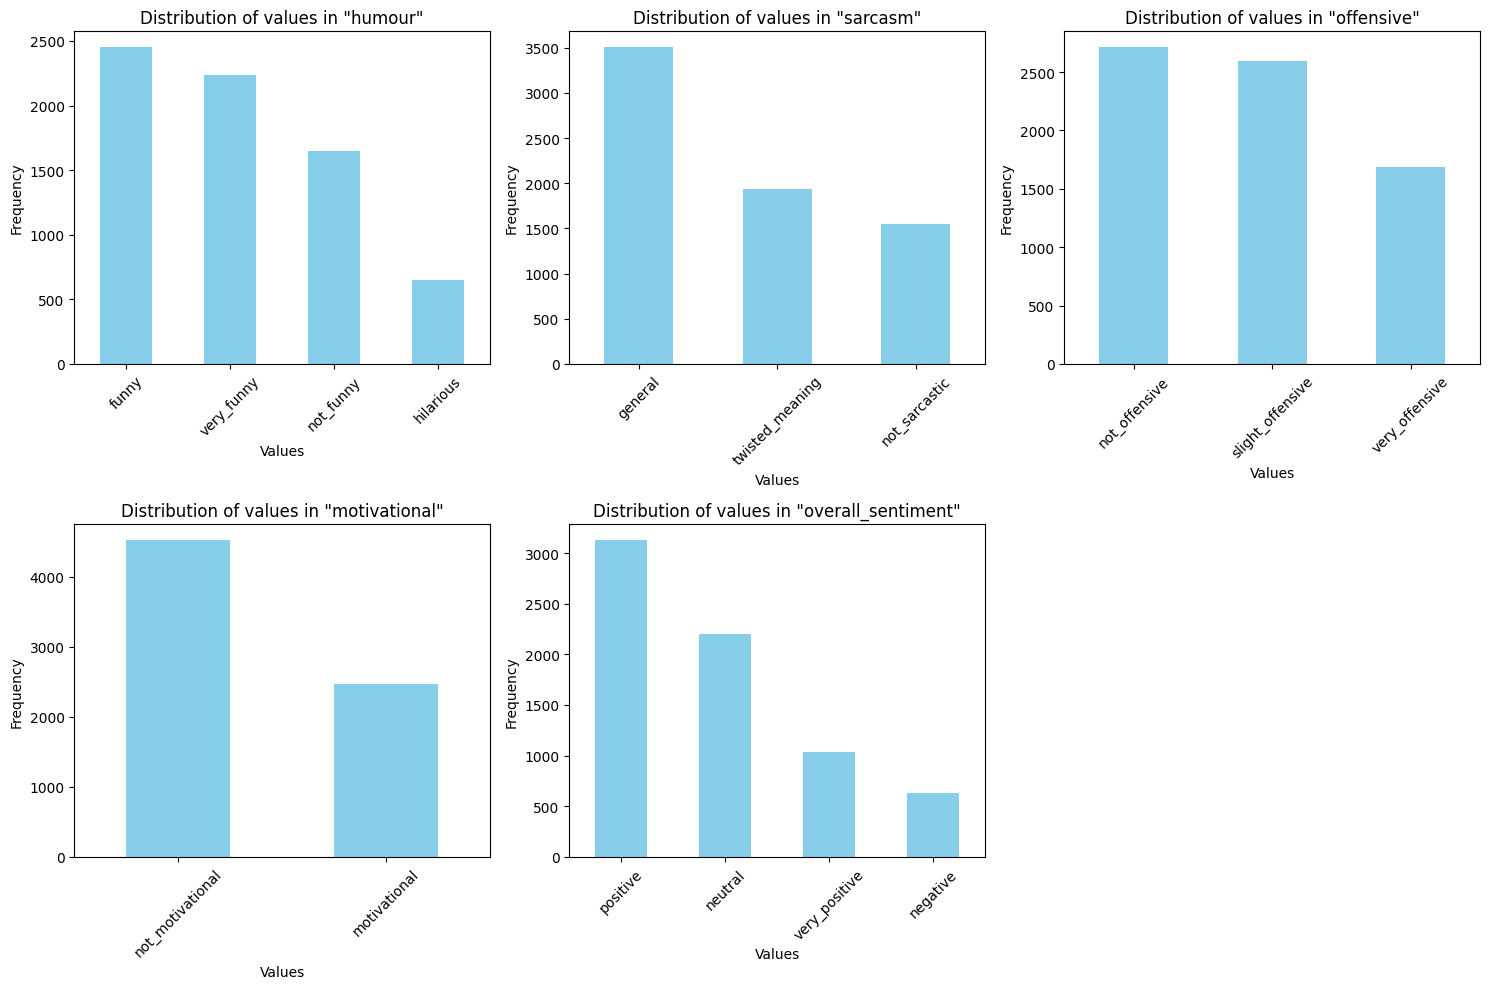

In [42]:
col_to_plot2 = ['humour', 'sarcasm', 'offensive', 'motivational', 'overall_sentiment']

# Creating subplots with 3 charts per row
fig, axes = plt.subplots(nrows=(len(col_to_plot2) + 2) // 3, ncols=3, figsize=(15, 10))  # Adjust the figure size
axes = axes.flatten()  # Flatten axes array for easy indexing

# Calculating and plotting the distribution of values in each specified column
for i, column in enumerate(col_to_plot2):
    if column in df_augmented.columns:
        value_counts = df_augmented[column].value_counts()

        # Plotting the distribution on the corresponding subplot
        value_counts.plot(kind='bar', color='skyblue', ax=axes[i])
        axes[i].set_title(f'Distribution of values in "{column}"')
        axes[i].set_xlabel('Values')
        axes[i].set_ylabel('Frequency')
        axes[i].tick_params(axis='x', rotation=45)
    else:
        print(f"Column '{column}' not found in the dataset.")
        axes[i].axis('off')  # Turn off unused subplot if column is missing

# Hide unused subplots if any
for j in range(len(col_to_plot2), len(axes)):
    axes[j].axis('off')  # Turn off unused subplots

plt.tight_layout()
plt.show()

# Saving new augumented dataset

In [39]:
# Linking dataset paths
dataset_path2 = drive_path + 'memotion_dataset_7k/df_augmented_v2.csv'
images_folder_path2 = drive_path + 'memotion_dataset_7k/images_aug/'

In [38]:
# Combining with original data if needed
augmented_df = pd.DataFrame(augmented_data)
df_augmented = pd.concat([df, augmented_df], ignore_index=True)

# Saving to CSV
df_augmented.to_csv('/content/drive/MyDrive/memotion_dataset_7k/df_augmented_v2.csv', index=False)